# **Superstore Sales Analysis**

# **Introduction**



This notebook presents an exploratory data analysis (EDA) of a Superstore sales dataset.
The goal is to uncover trends and insights related to sales performance, customer behavior,
and profitability. We'll walk through data cleaning, feature engineering, visualization,
and even implement a simple linear regression model to predict profit based on key sales features.

# **Import Libraries**

In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Dataset**

In [13]:
#load Dataset
df = pd.read_csv('/ Superstore.csv', encoding='ISO-8859-1')
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

# **Data Cleaning**


In [ ]:
# Data Cleaning
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [5]:
# Drop columns we won't use
df.drop(['Postal Code'], axis=1, inplace=True)

# **Exploratory Data Analysis (EDA)**

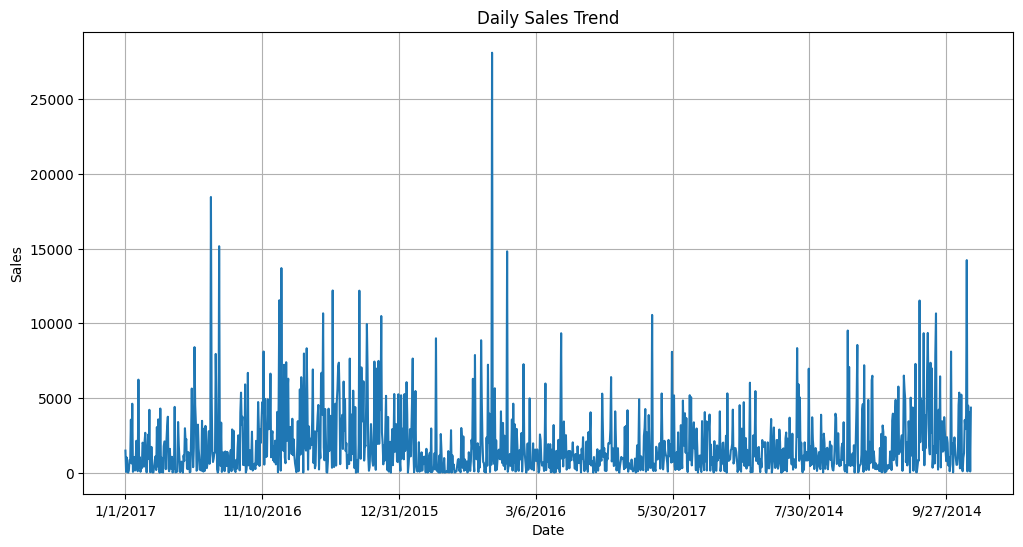

In [6]:
# Sales Trend Over Time
sales_trend = df.groupby('Order Date')['Sales'].sum()

plt.figure(figsize=(12, 6))
sales_trend.plot()
plt.title("Daily Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.grid()
plt.show()

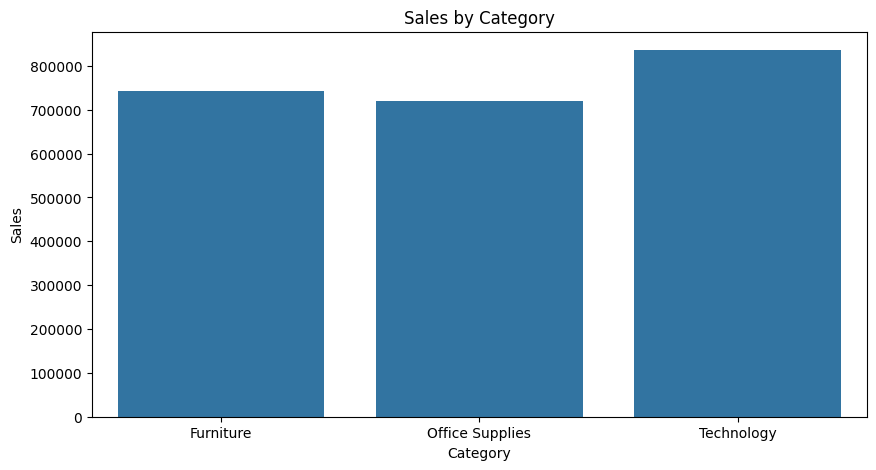

<ipython-input-7-4ba2b9d341bd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values('Sales', ascending=False),


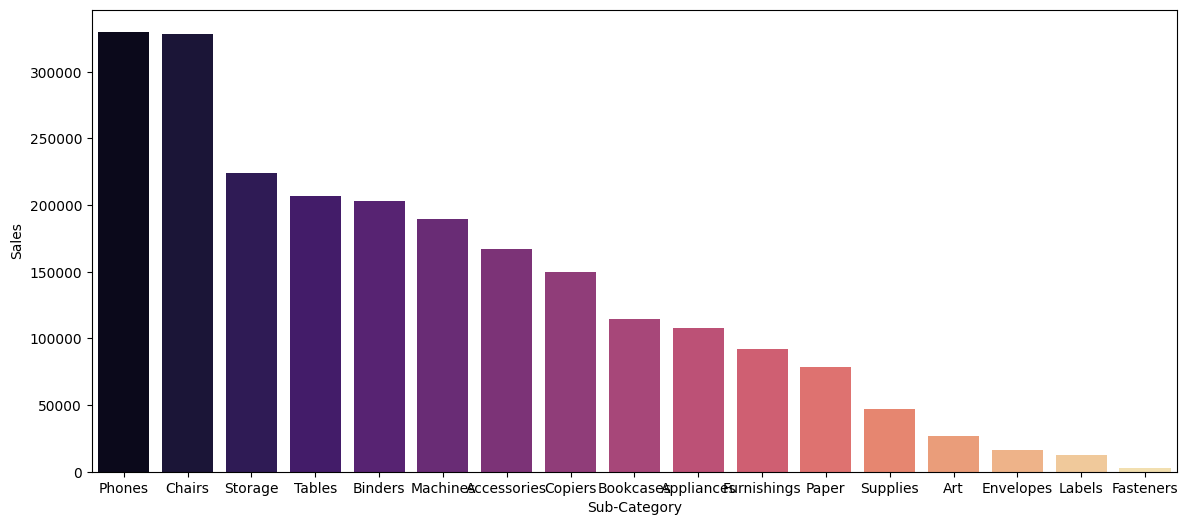

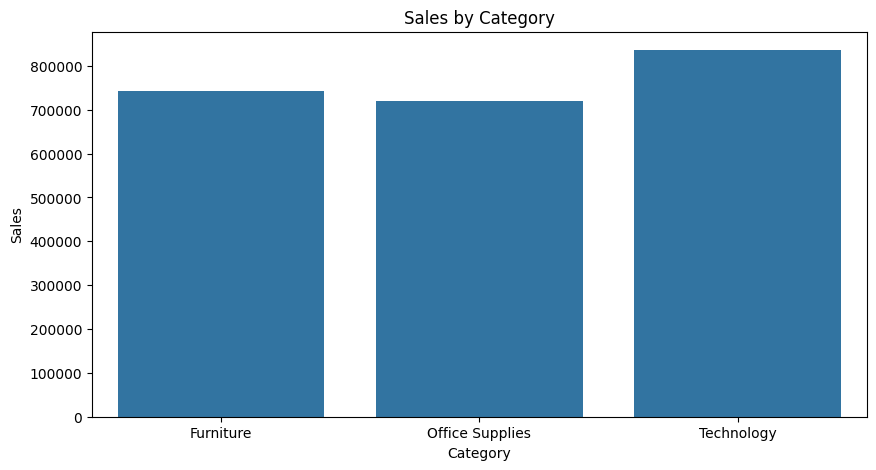

<ipython-input-7-4ba2b9d341bd>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values('Sales', ascending=False),


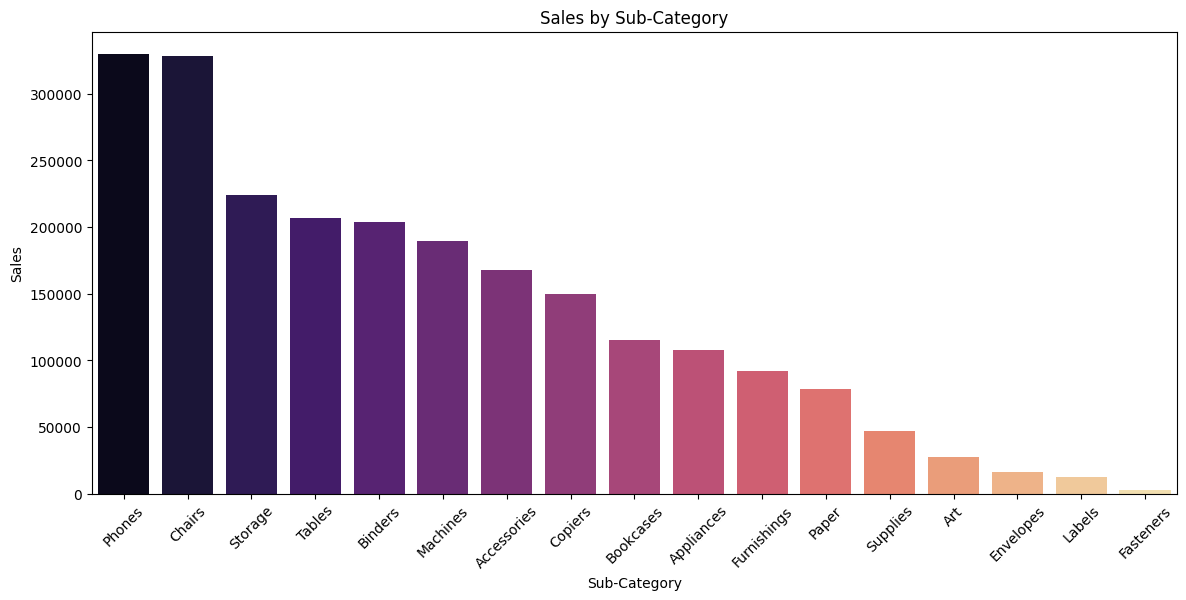

In [7]:
# Sales by Category and Sub-Category
plt.figure(figsize=(10, 5))
sns.barplot(data=df.groupby('Category')['Sales'].sum().reset_index(), x='Category', y='Sales')
plt.title('Sales by Category')
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(data=df.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values('Sales', ascending=False),
            x='Sub-Category', y='Sales', palette='magma')
# Sales by Category and Sub-Category
plt.figure(figsize=(10, 5))
sns.barplot(data=df.groupby('Category')['Sales'].sum().reset_index(), x='Category', y='Sales')
plt.title('Sales by Category')
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(data=df.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values('Sales', ascending=False),
            x='Sub-Category', y='Sales', palette='magma')
plt.title('Sales by Sub-Category')
plt.xticks(rotation=45)
plt.show()

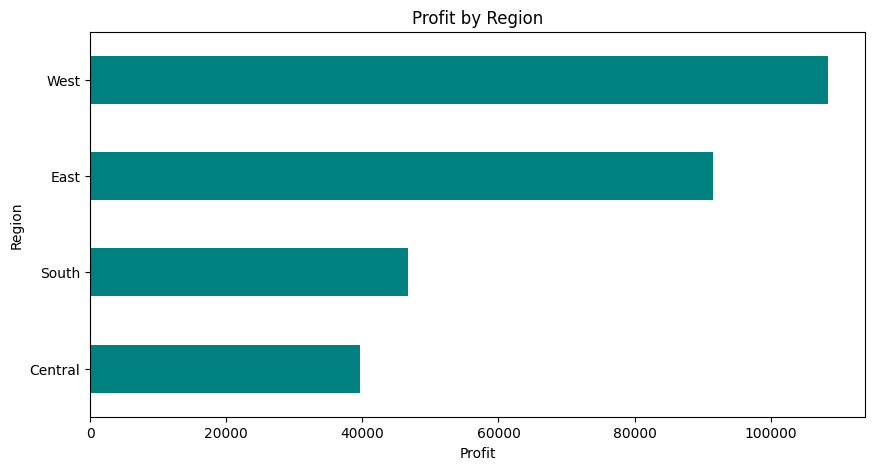

In [8]:
#Profit by Region
profit_region = df.groupby('Region')['Profit'].sum().sort_values()

profit_region.plot(kind='barh', color='teal', figsize=(10, 5))
plt.title('Profit by Region')
plt.xlabel('Profit')
plt.show()

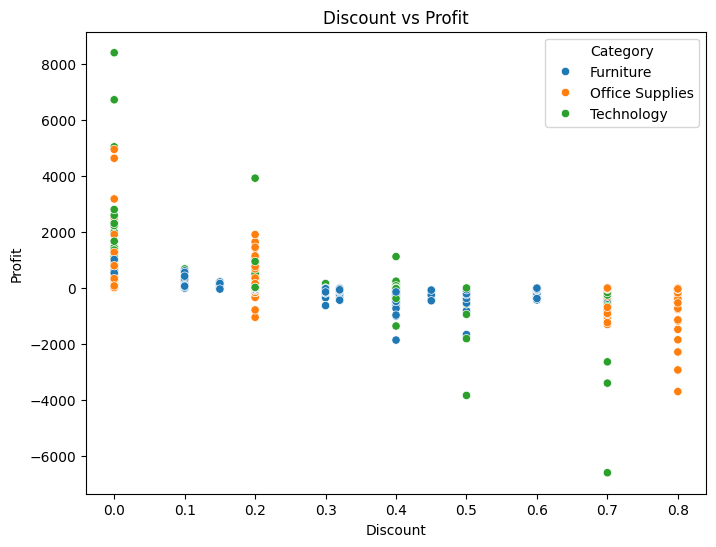

In [9]:
# Discount vs Profit Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Discount vs Profit')
plt.show()

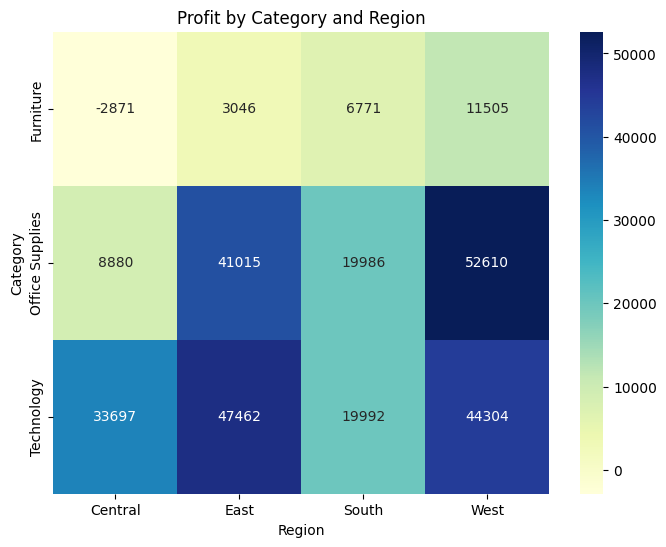

In [10]:
# Heatmap of Profit by Category & Region
pivot = df.pivot_table(values='Profit', index='Category', columns='Region', aggfunc='sum')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Profit by Category and Region')
plt.show()

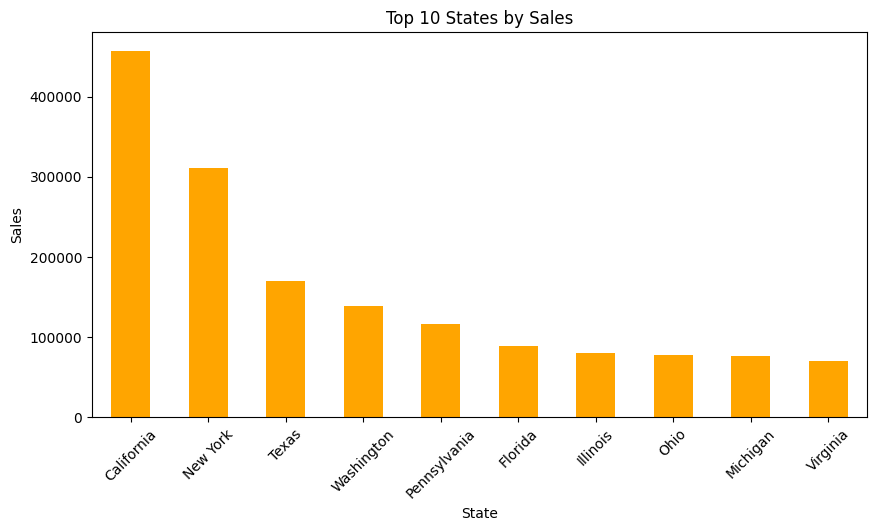

In [11]:
# Top 10 States by Sales
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
top_states.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title('Top 10 States by Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

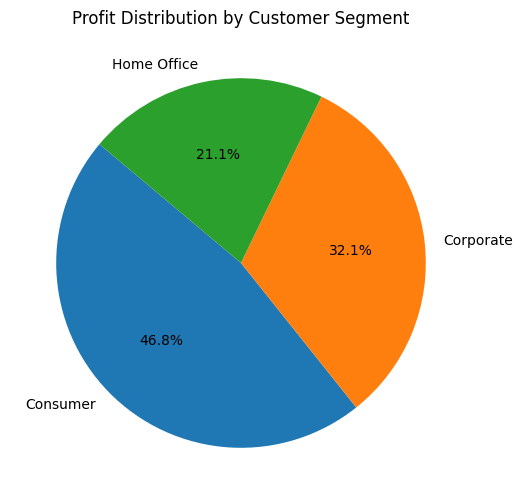

In [12]:
#Customer Segment Performance
segment_profit = df.groupby('Segment')['Profit'].sum()
segment_profit.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(6, 6))
plt.title('Profit Distribution by Customer Segment')
plt.ylabel('')
plt.show()

# **Conclusion**


The Superstore Sales Analysis revealed insightful trends in sales, profit, and customer behavior.
Key findings include:
- Sales generally increase over time with noticeable monthly fluctuations.
- Office Supplies contribute the highest sales, while Technology yields higher profit margins.
- The West region shows the highest profitability.
- Discounts negatively correlate with profit, suggesting over-discounting may harm profitability.
- A basic regression model indicates that sales and discount can moderately predict profit, but more features and refined modeling may improve performance.

This analysis can support strategic decisions in inventory management, pricing, and marketing.